**Import dependancies**

In [344]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow
import numpy
import pandas
from sklearn import tree, metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

**Import the dataset**

In [345]:
dataSet = pandas.read_csv("z-AssignmentTrainingData100.csv")
#print(dataSet)

**Convert non-numerical fields to numerical values**

In [346]:
convert = {True: 1, False: 0}
dataSet['SuccessTF'] = dataSet['SuccessTF'].map(convert)
#print(dataSet)

**Divide the data into features (Attributes), and output (labels)**

In [347]:
features = ['OvertakingSpeedMPS', 'OncomingSpeedMPS', 'InitialSeparationM']
input = dataSet[features]
output = dataSet['SuccessTF']
#print(input)
#print(output)

**SKLEARN has the ability to automtically split dataset into training and testing data**

In [348]:
from sklearn.model_selection import train_test_split
input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.2, random_state=0)

**Create the layers**
*   `input_shape=[3]` — This specifies that the input to this layer is 3 values.
*   `units=1` — This specifies the number of neurons in the layer, also the size of the model's output which must match the `input_shape` of the next layer.

Layers after the first only need the units value as it will inherit the input_shape from the previous layer.

In [349]:
l0 = tensorflow.keras.layers.Dense(input_shape=[3], units=4)
l1 = tensorflow.keras.layers.Dense(units=2)
l2 = tensorflow.keras.layers.Dense(units=1)
l3 = tensorflow.keras.layers.Dense(units=1)
l4 = tensorflow.keras.layers.Dense(units=1)

**Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as argument, specifying the calculation order from the input to the output.**

In [350]:
model = tensorflow.keras.Sequential([l0, l1, l2])

**Before training, the model has to be compiled.**
- Loss function: A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)
- Optimizer function(Learning Rate): A way of adjusting internal values in order to reduce the loss.The learning rate is the step size taken when adjusting values in the model.

The loss function used here are standard for simple models.
Learning rate range is usually within 0.001 (default), and 0.1.

In [351]:
model.compile(loss='mean_squared_error', optimizer=tensorflow.keras.optimizers.Adam(0.05))

**Train the model by calling the `fit` method.**

The first argument is the inputs, the second argument is the desired outputs. The `epochs` argument specifies how many times this cycle should be run, and the `verbose` argument controls how much output the method produces.

In [352]:
history = model.fit(input_train, output_train, epochs=200, verbose=False)
print("Finished training model")

Finished training model


**Visualise the training.**
The `fit` method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the predicted output is far from the expected output.

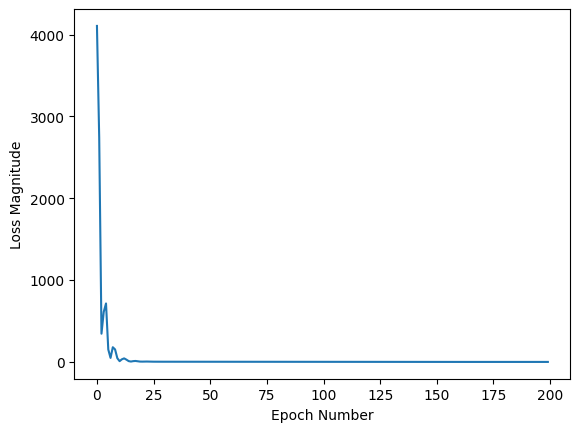

In [353]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

**Use the model to test predict new things**

In [354]:
outcome = model.predict(input_test)

mae = metrics.mean_absolute_error(output_test, outcome)
print('Mean Absolute Error:', mae)
maeCheck = (max(output_test)-min(output_test))*0.1
if mae > maeCheck:
    print('\033[91m'+'MAE indicates your algorithm needs improving'+'\033[0m')


evalValue = numpy.sqrt(metrics.mean_squared_error(output_test, outcome))
print('Root Mean Squared Error:', evalValue)
avgOutput = numpy.average(output)
if evalValue > avgOutput*0.1:
    print('\033[91m'+'RSME indicates your algorithm needs improving'+'\033[0m')

1/1 [==============================] - 0s 50ms/step
Mean Absolute Error: 0.24434438943862916
MAE indicates your algorithm needs improving
Root Mean Squared Error: 0.3061031003107067
RSME indicates your algorithm needs improving


You can use more layers but when you look at the variables, they are nothing even close to ~1.8 and ~32. The added complexity hides the "simple" form of the conversion equation.

We can look at the internal variables of the Dense layer. 
For a single neuron with a single input and a single output, the internal math looks the same as [the equation for a line].
$y = mx + b$

We are looking for variables 52000, 990, 16...

print("These are the layer variables: {}".format(l0.get_weights()))